In [50]:
import warnings
import datetime, pytz
from persiantools.jdatetime import JalaliDate
from persiantools.jdatetime import JalaliDateTime
import jalali
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [92]:
data=pd.read_excel(r'C:\Users\asus\Desktop\PHMSA\Electricity\NEW\no planning.xlsx','Sheet2')
data.head()

,date,feeder0,feeder1,feeder2,feeder3,feeder4,feeder5,feeder6,feeder7,feeder8,feeder9,feeder10,feeder11,feeder12,feeder13,time
0,1395/01/01,11,0,0,1,0,0,0,1,0,0,0,0,0,0,22:33
1,1395/01/02,11,0,0,1,0,0,1,0,0,0,0,0,0,0,19:22
2,1395/01/03,11,1,1,1,0,0,0,0,0,0,0,0,0,0,19:21
3,1395/01/04,13,3,1,0,0,0,2,0,0,0,0,0,0,0,18:25
4,1395/01/05,9,5,0,0,0,0,0,0,0,0,0,0,0,0,18:20


In [93]:
data['date']=data['date'] + ' ' + data['time']
data.head()

,date,feeder0,feeder1,feeder2,feeder3,feeder4,feeder5,feeder6,feeder7,feeder8,feeder9,feeder10,feeder11,feeder12,feeder13,time
0,1395/01/01 22:33,11,0,0,1,0,0,0,1,0,0,0,0,0,0,22:33
1,1395/01/02 19:22,11,0,0,1,0,0,1,0,0,0,0,0,0,0,19:22
2,1395/01/03 19:21,11,1,1,1,0,0,0,0,0,0,0,0,0,0,19:21
3,1395/01/04 18:25,13,3,1,0,0,0,2,0,0,0,0,0,0,0,18:25
4,1395/01/05 18:20,9,5,0,0,0,0,0,0,0,0,0,0,0,0,18:20


In [94]:
time=list()
for i in data['date']:
    i=i.split()
    yeardaymonth=i[0].split("/")
    hourandminute=i[1].split(":")
    time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
data['date']=time

In [95]:
df0=data[['date','feeder0']]
df0 = df0.sort_values('date')

In [96]:
df0 = df0.groupby('date')['feeder0'].sum().reset_index()

In [97]:
df0 = df0.set_index('date')
df0.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [106]:
y = df0['feeder0']

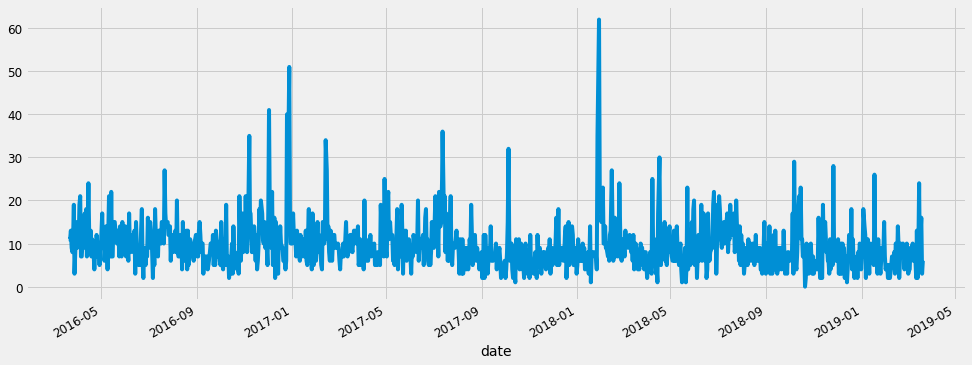

In [107]:
y.plot(figsize=(15, 6))
plt.show()

In [108]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [109]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2511      0.023     11.002      0.000       0.206       0.296
ma.L1         -1.0000      3.188     -0.314      0.754      -7.248       5.248
ar.S.L12      -0.4849      0.015    -32.222      0.000      -0.514      -0.455
sigma2        39.3754    125.620      0.313      0.754    -206.835     285.586


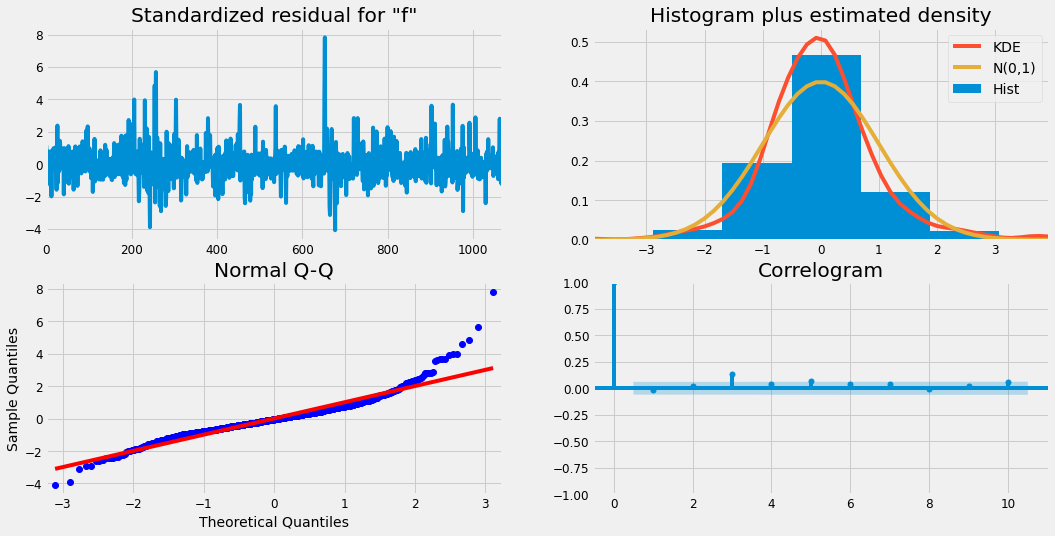

In [110]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

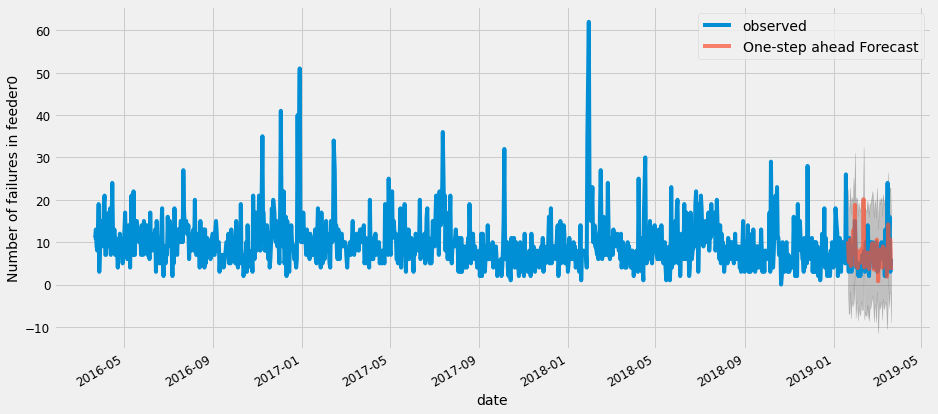

In [111]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder0')
plt.legend()
plt.show()

__MSE__

In [112]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22.83


__RMSE__

In [113]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4.78


# Feeder1

In [114]:
df1=data[['date','feeder1']]
df1 = df1.sort_values('date')

In [115]:
df1 = df1.groupby('date')['feeder1'].sum().reset_index()

In [116]:
df1 = df1.set_index('date')
df1.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [117]:
y = df1['feeder1']

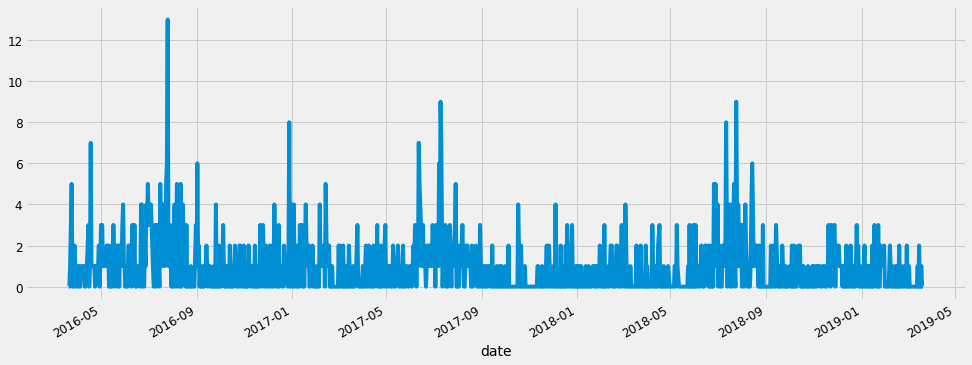

In [118]:
y.plot(figsize=(15, 6))
plt.show()

In [119]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [120]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0894      0.023      3.874      0.000       0.044       0.135
ma.L1         -1.0000      2.178     -0.459      0.646      -5.268       3.268
ar.S.L12      -0.5186      0.017    -30.169      0.000      -0.552      -0.485
sigma2         2.1501      4.694      0.458      0.647      -7.050      11.350


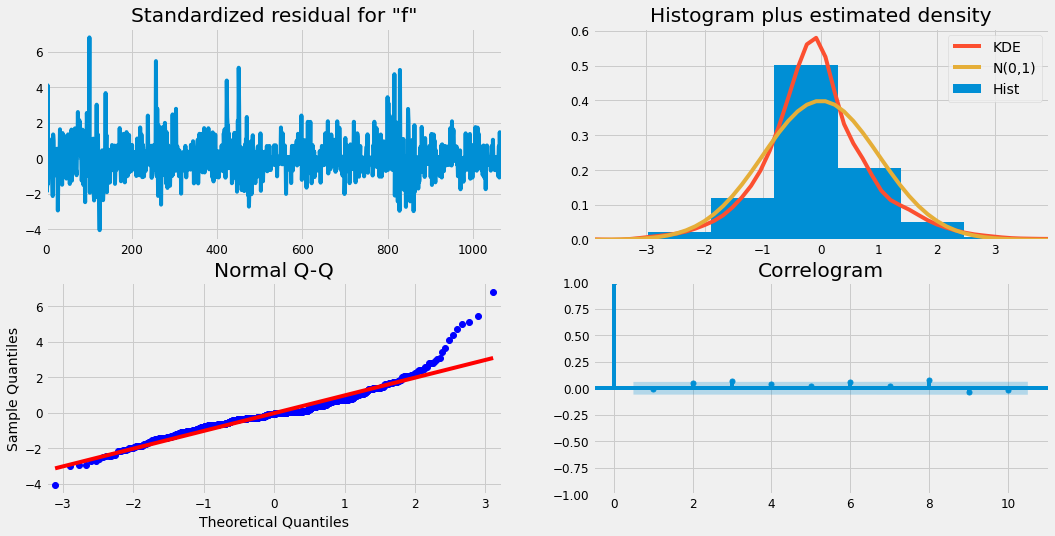

In [121]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

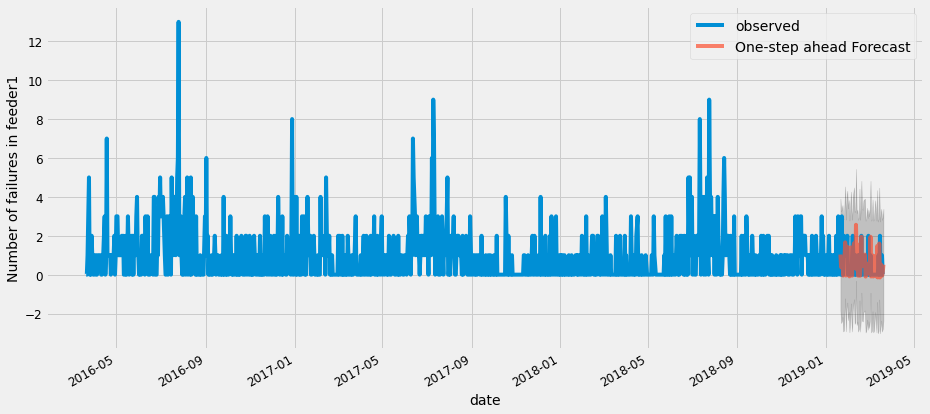

In [122]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder1')
plt.legend()
plt.show()

__MSE__

In [123]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.86


__RMSE__

In [124]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.93


# Feeder2

In [125]:
df2=data[['date','feeder2']]
df2 = df2.sort_values('date')

In [126]:
df2 = df2.groupby('date')['feeder2'].sum().reset_index()

In [127]:
df2 = df2.set_index('date')
df2.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [205]:
y = df2['feeder2']

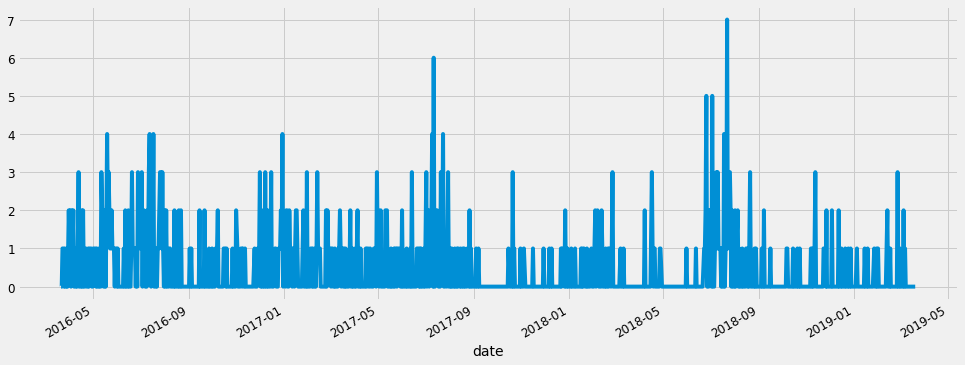

In [206]:
y.plot(figsize=(15, 6))
plt.show()

In [207]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [208]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0390      0.030     -1.307      0.191      -0.098       0.020
ma.L1         -0.9250      0.010    -97.230      0.000      -0.944      -0.906
ar.S.L12      -0.4489      0.019    -24.178      0.000      -0.485      -0.413
sigma2         1.0069      0.027     37.986      0.000       0.955       1.059


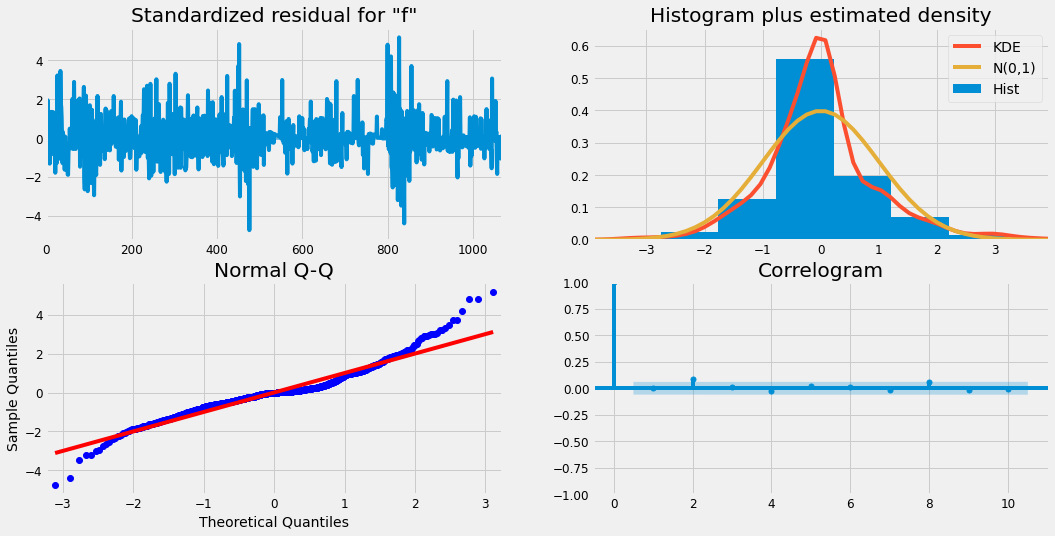

In [209]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

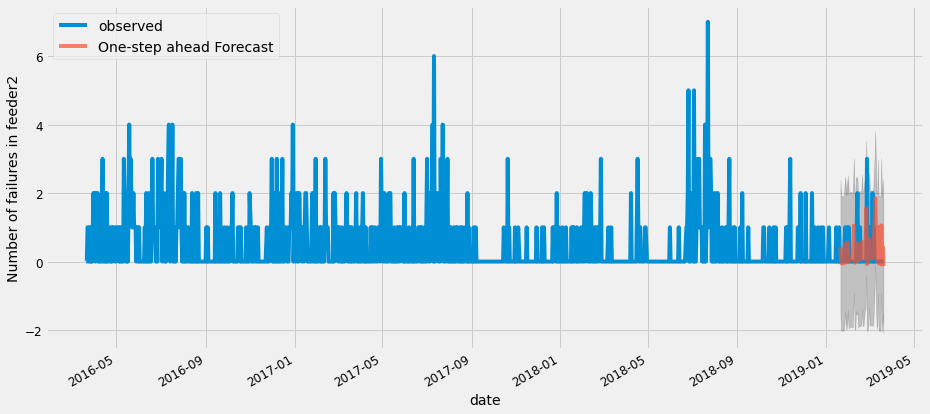

In [211]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder2')
plt.legend()
plt.show()

__MSE__

In [212]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.53


__RMSE__

In [213]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.73


# Feeder3


In [214]:
df3=data[['date','feeder3']]
df3 = df3.sort_values('date')

In [215]:
df3 = df3.groupby('date')['feeder3'].sum().reset_index()

In [216]:
df3 = df3.set_index('date')
df3.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [217]:
y = df3['feeder3']

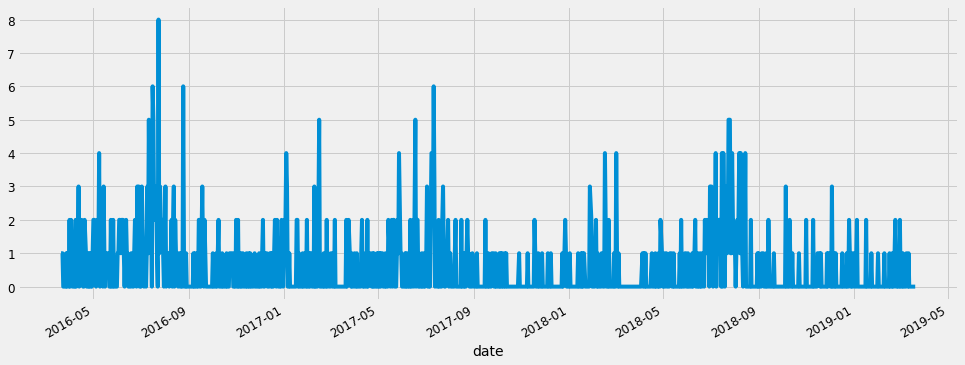

In [218]:
y.plot(figsize=(15, 6))
plt.show()

In [219]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [220]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0608      0.026      2.348      0.019       0.010       0.112
ma.L1         -0.9503      0.008   -114.598      0.000      -0.967      -0.934
ar.S.L12      -0.4879      0.018    -27.709      0.000      -0.522      -0.453
sigma2         1.2088      0.032     37.230      0.000       1.145       1.272


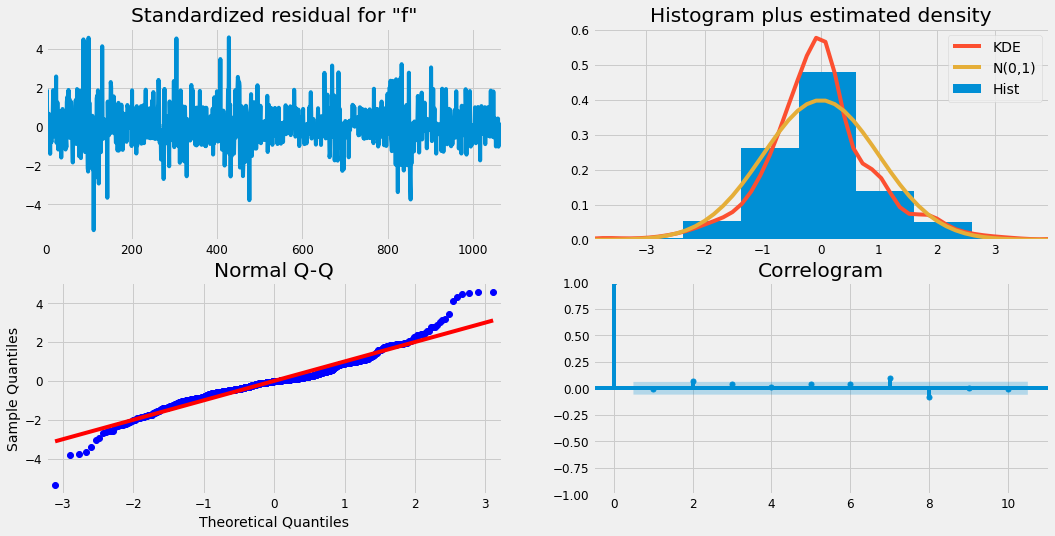

In [221]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

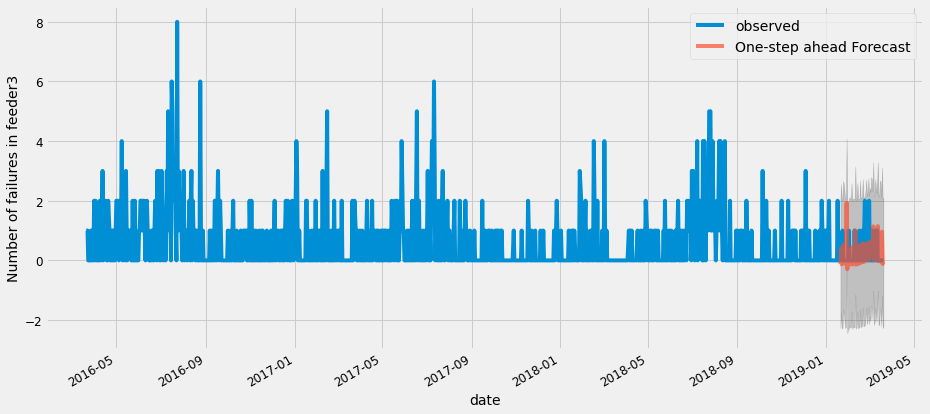

In [222]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder3')
plt.legend()
plt.show()

__MSE__

In [223]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.46


__RMSE__

In [224]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.68


# Feeder4

In [225]:
df4=data[['date','feeder4']]
df4 = df4.sort_values('date')

In [226]:
df4 = df4.groupby('date')['feeder4'].sum().reset_index()

In [227]:
df4 = df4.set_index('date')
df4.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [228]:
y = df4['feeder4']

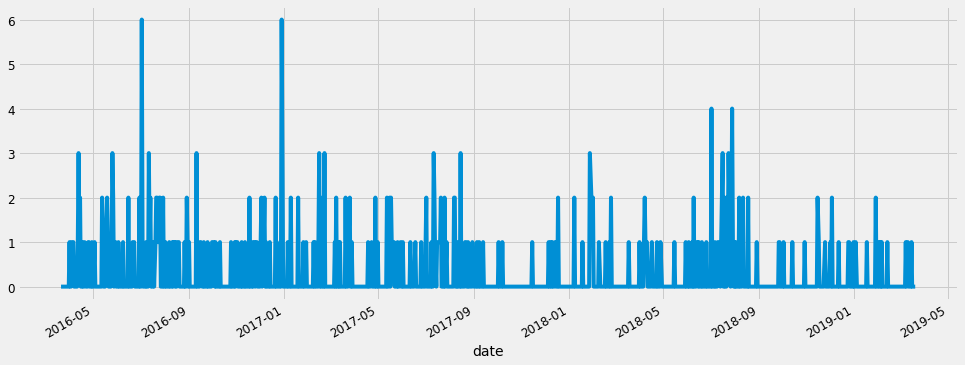

In [229]:
y.plot(figsize=(15, 6))
plt.show()

In [230]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [231]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1004      0.025      4.040      0.000       0.052       0.149
ma.L1         -1.0000      2.529     -0.395      0.693      -5.957       3.957
ar.S.L12      -0.4398      0.015    -30.177      0.000      -0.468      -0.411
sigma2         0.6261      1.584      0.395      0.693      -2.479       3.731


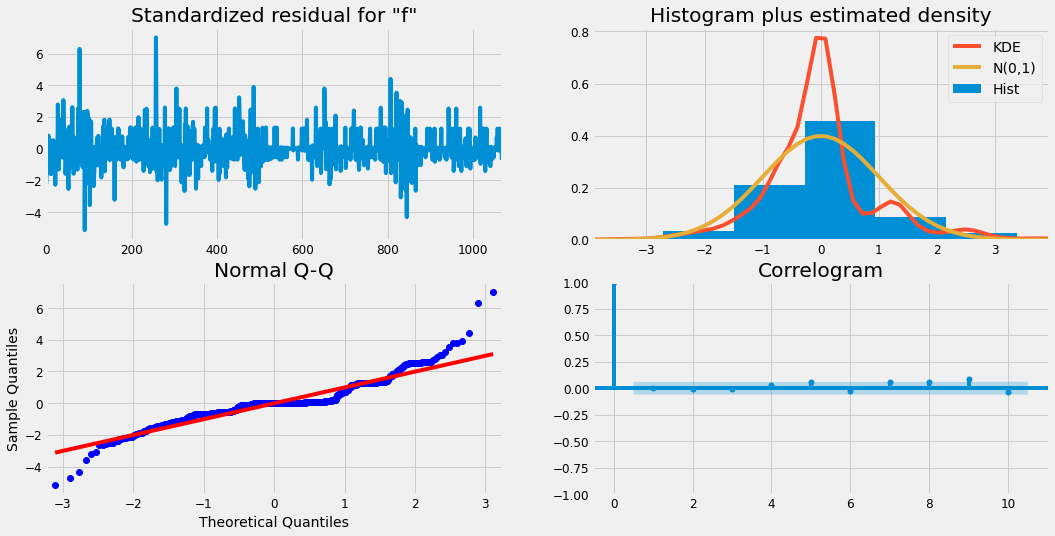

In [232]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

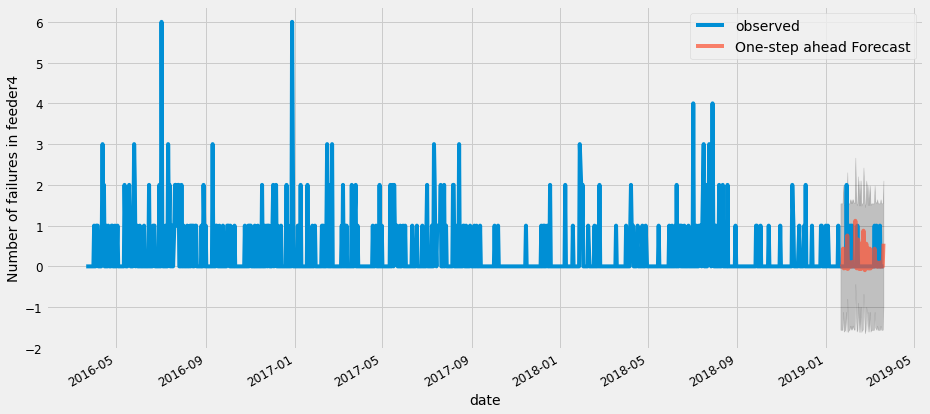

In [233]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder4')
plt.legend()
plt.show()

__MSE__

In [234]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.27


__RMSE__

In [235]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.52


# Feeder5

In [236]:
df5=data[['date','feeder5']]
df5 = df5.sort_values('date')

In [237]:
df5 = df5.groupby('date')['feeder5'].sum().reset_index()

In [238]:
df5 = df5.set_index('date')
df5.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [239]:
y = df5['feeder5']

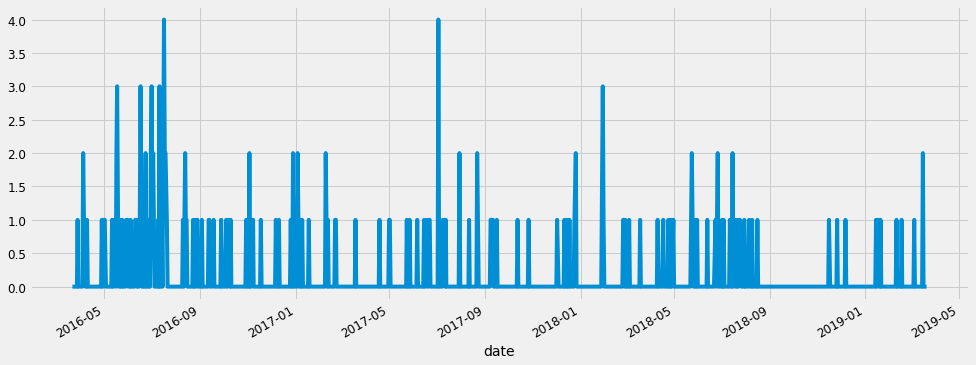

In [240]:
y.plot(figsize=(15, 6))
plt.show()

In [241]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [242]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1830      0.022      8.470      0.000       0.141       0.225
ma.L1         -1.0000      4.560     -0.219      0.826      -9.938       7.938
ar.S.L12      -0.5578      0.014    -41.209      0.000      -0.584      -0.531
sigma2         0.3090      1.411      0.219      0.827      -2.456       3.074


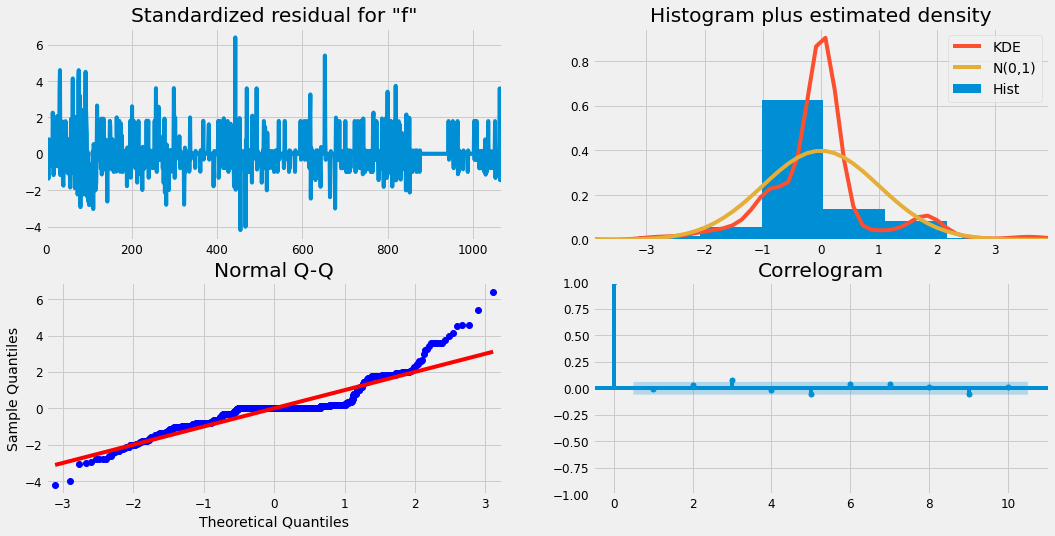

In [243]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

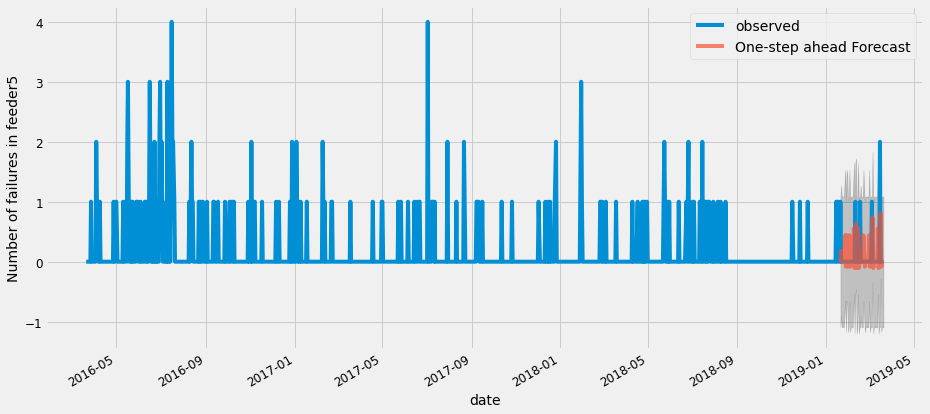

In [244]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder5')
plt.legend()
plt.show()

__MSE__

In [245]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.18


__RMSE__

In [246]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.43


# Feeder6

In [247]:
df6=data[['date','feeder6']]
df6 = df6.sort_values('date')

In [248]:
df6 = df6.groupby('date')['feeder6'].sum().reset_index()

In [249]:
df6 = df6.set_index('date')
df6.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [250]:
y = df6['feeder6']

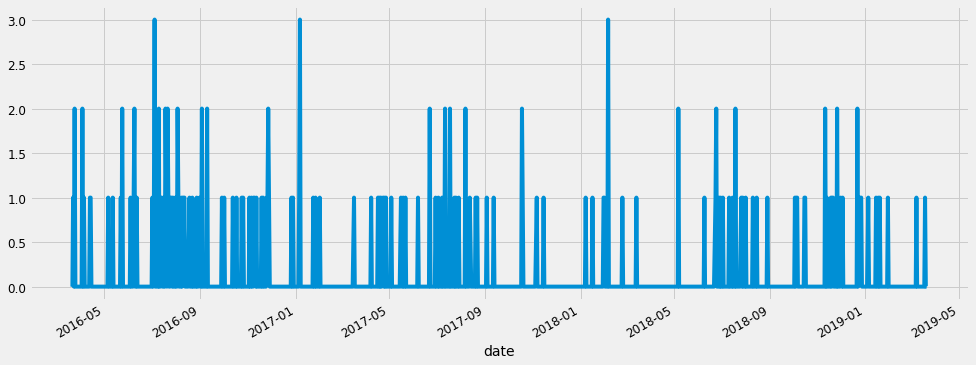

In [251]:
y.plot(figsize=(15, 6))
plt.show()

In [252]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [253]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0183      0.029      0.629      0.529      -0.039       0.075
ma.L1         -1.0000      3.215     -0.311      0.756      -7.302       5.302
ar.S.L12      -0.4868      0.016    -30.067      0.000      -0.519      -0.455
sigma2         0.2719      0.876      0.310      0.756      -1.445       1.989


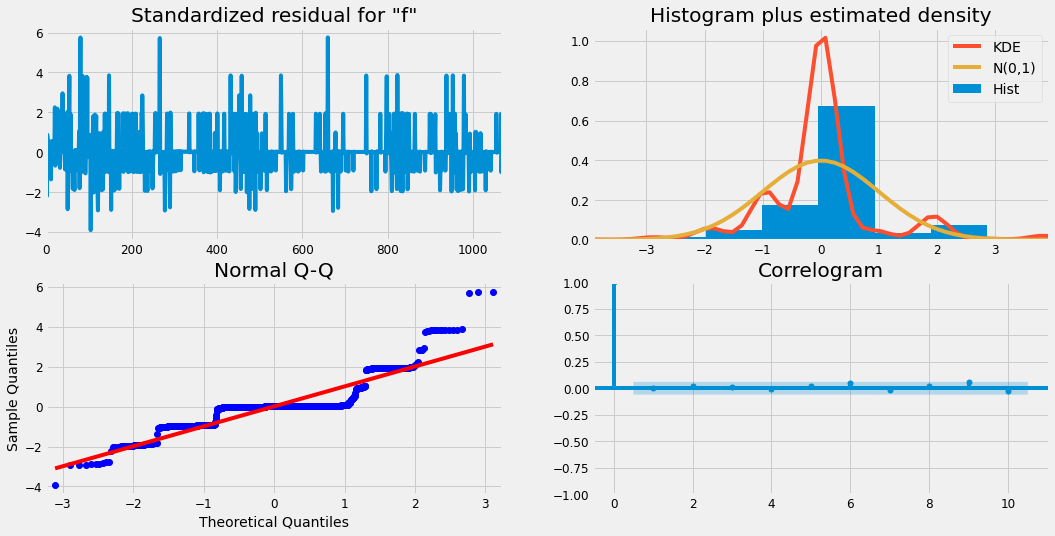

In [254]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

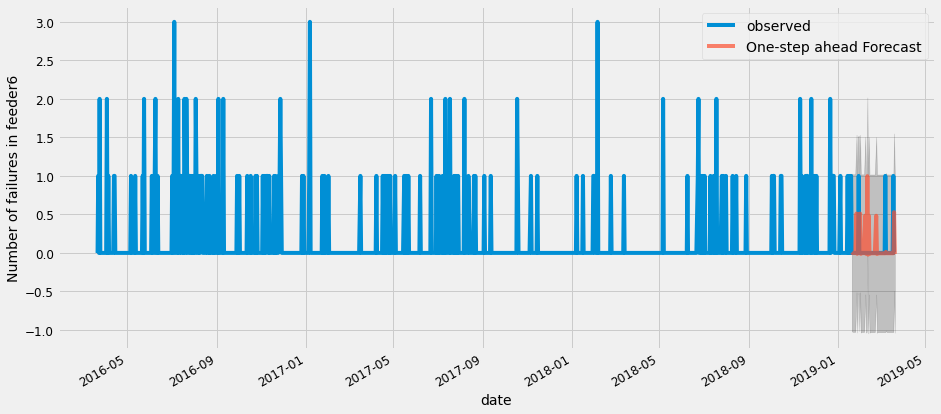

In [255]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder6')
plt.legend()
plt.show()

__MSE__

In [256]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.08


__RMSE__

In [257]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.29


# Feeder7


In [258]:
df7=data[['date','feeder7']]
df7 = df7.sort_values('date')

In [259]:
df7 = df7.groupby('date')['feeder7'].sum().reset_index()

In [260]:
df7 = df7.set_index('date')
df7.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [261]:
y = df7['feeder7']

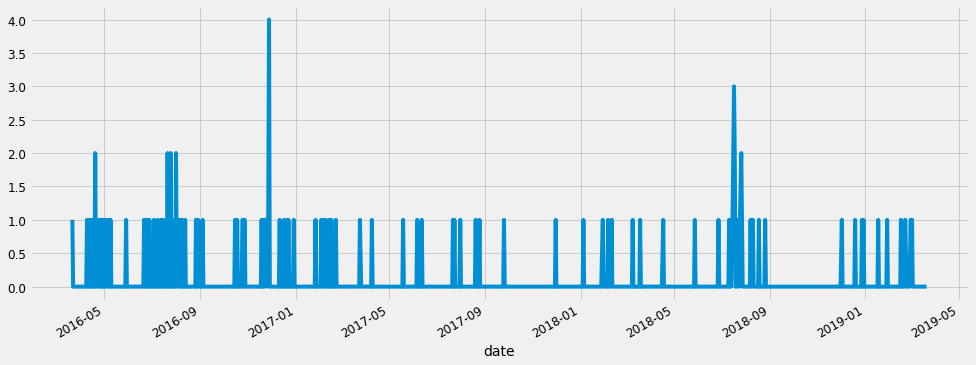

In [262]:
y.plot(figsize=(15, 6))
plt.show()

In [263]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [264]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0346      0.023     -1.472      0.141      -0.081       0.011
ma.L1         -0.8704      0.011    -79.516      0.000      -0.892      -0.849
ar.S.L12      -0.5336      0.012    -43.057      0.000      -0.558      -0.509
sigma2         0.1777      0.003     50.950      0.000       0.171       0.184


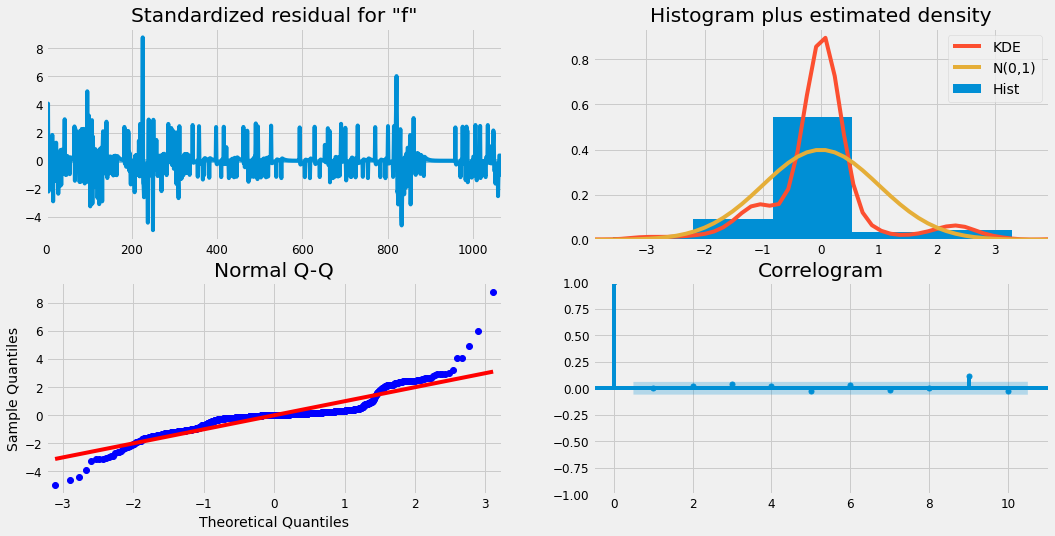

In [265]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

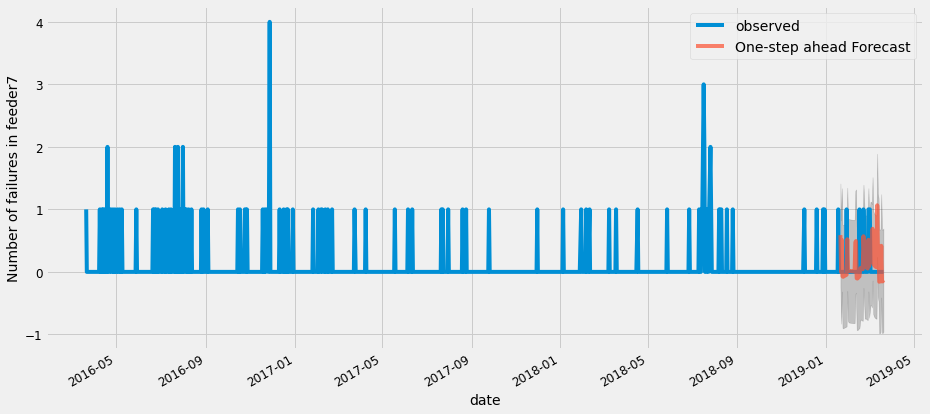

In [269]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder7')
plt.legend()
plt.show()

__MSE__

In [270]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.14


__RMSE__

In [271]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.37


# Feeder8

In [272]:
df8=data[['date','feeder8']]
df8 = df8.sort_values('date')

In [273]:
df8 = df8.groupby('date')['feeder8'].sum().reset_index()

In [274]:
df8 = df8.set_index('date')
df8.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [275]:
y = df8['feeder8']

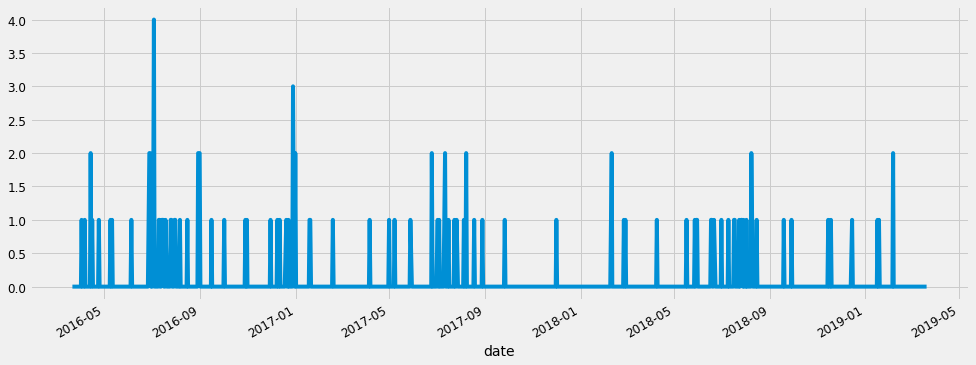

In [276]:
y.plot(figsize=(15, 6))
plt.show()

In [277]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [278]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1247      0.023      5.446      0.000       0.080       0.170
ma.L1         -1.0000      4.428     -0.226      0.821      -9.678       7.678
ar.S.L12      -0.4254      0.013    -33.586      0.000      -0.450      -0.401
sigma2         0.1847      0.818      0.226      0.821      -1.419       1.789


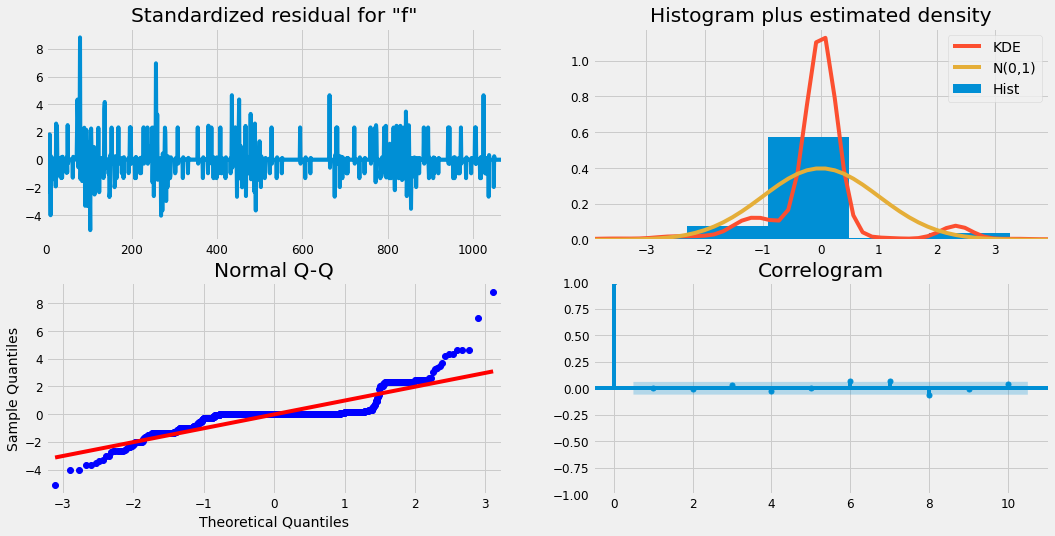

In [279]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

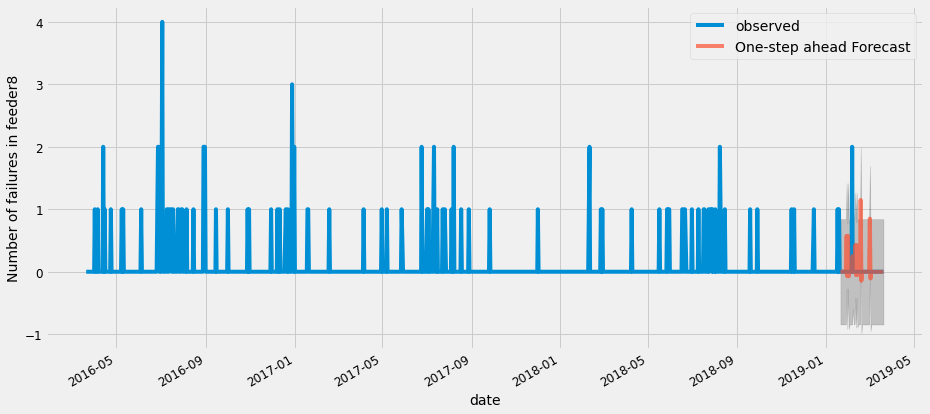

In [280]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder8')
plt.legend()
plt.show()

__MSE__

In [281]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.12


__RMSE__

In [283]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.35


# Feeder9

In [284]:
df9=data[['date','feeder9']]
df9 = df9.sort_values('date')

In [285]:
df9 = df9.groupby('date')['feeder9'].sum().reset_index()

In [286]:
df9 = df9.set_index('date')
df9.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [287]:
y = df9['feeder9']

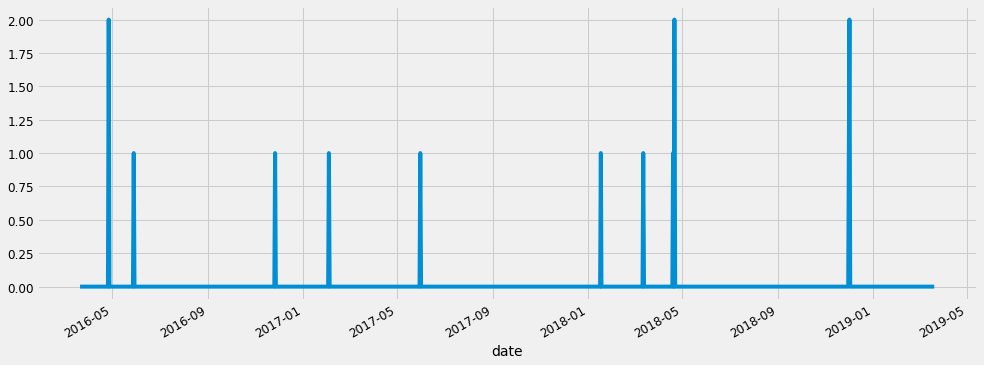

In [288]:
y.plot(figsize=(15, 6))
plt.show()

In [289]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [290]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0005      0.093      0.005      0.996      -0.181       0.182
ma.L1         -1.0000      3.348     -0.299      0.765      -7.563       5.563
ar.S.L12      -0.5000      0.005    -94.071      0.000      -0.510      -0.490
sigma2         0.0267      0.089      0.298      0.766      -0.149       0.202


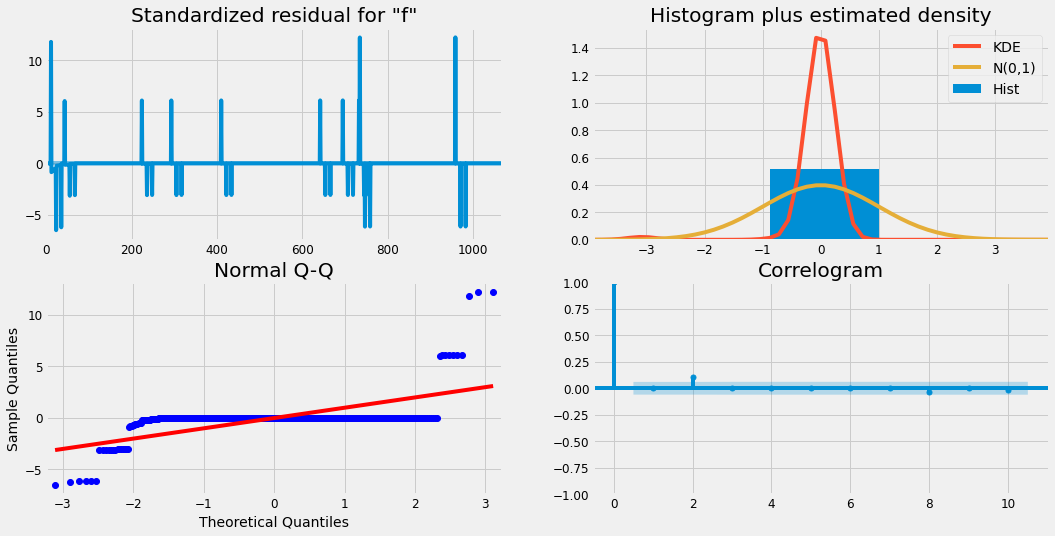

In [291]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

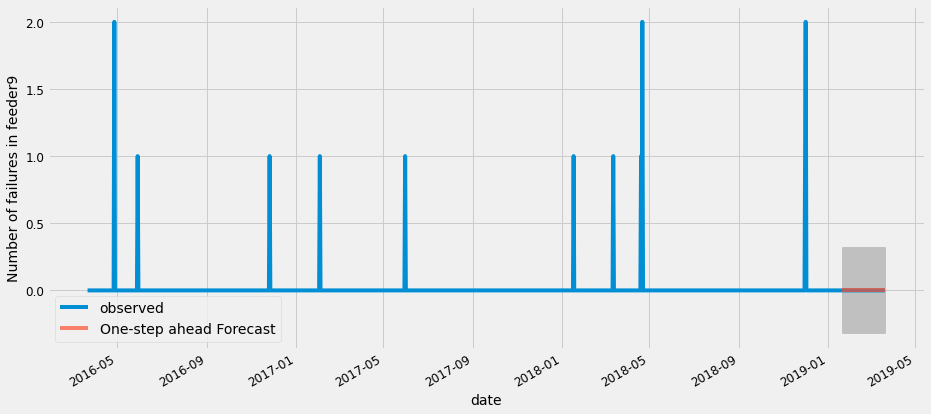

In [296]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder9')
plt.legend()
plt.show()

__MSE__

In [297]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


__RMSE__

In [298]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.0


# Feeder10

In [299]:
df10=data[['date','feeder10']]
df10 = df10.sort_values('date')

In [300]:
df10 = df10.groupby('date')['feeder10'].sum().reset_index()

In [301]:
df10 = df10.set_index('date')
df10.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [302]:
y = df10['feeder10']

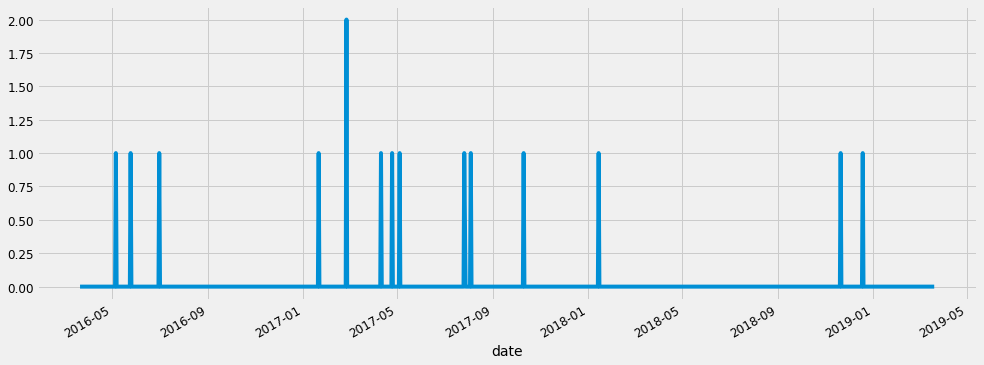

In [303]:
y.plot(figsize=(15, 6))
plt.show()

In [304]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [305]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0005      0.333      0.001      0.999      -0.653       0.654
ma.L1         -1.0000      8.892     -0.112      0.910     -18.427      16.427
ar.S.L12      -0.5294      0.007    -81.340      0.000      -0.542      -0.517
sigma2         0.0229      0.204      0.112      0.910      -0.376       0.422


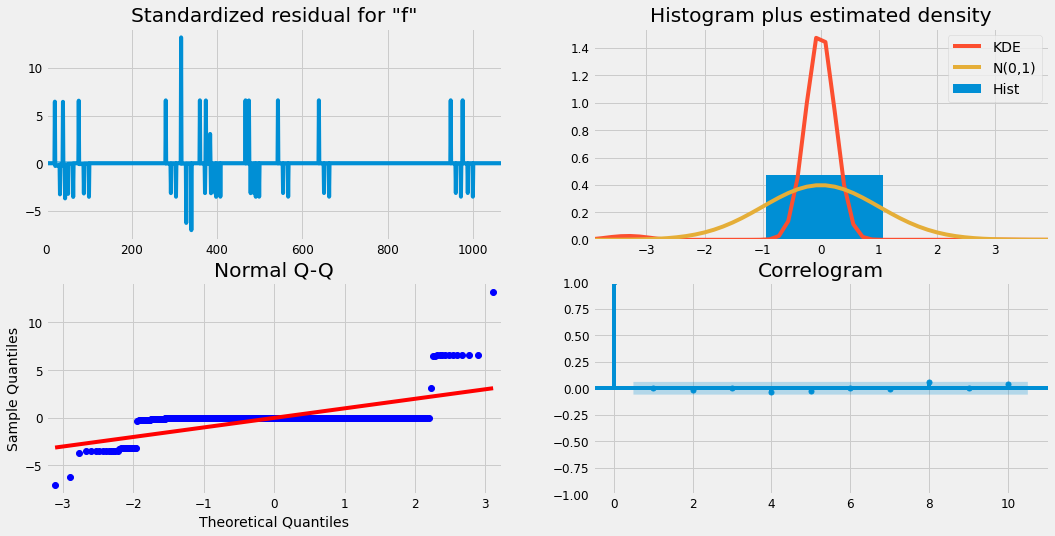

In [306]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

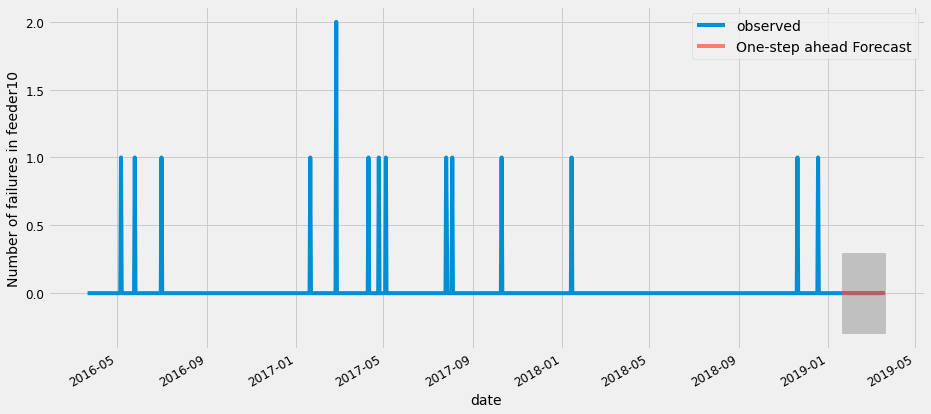

In [311]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder10')
plt.legend()
plt.show()

__MSE__

In [312]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


__RMSE__

In [313]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.0


# Feeder11

In [314]:
df11=data[['date','feeder11']]
df11 = df11.sort_values('date')

In [315]:
df11 = df11.groupby('date')['feeder11'].sum().reset_index()

In [316]:
df11 = df11.set_index('date')
df11.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [317]:
y = df11['feeder11']

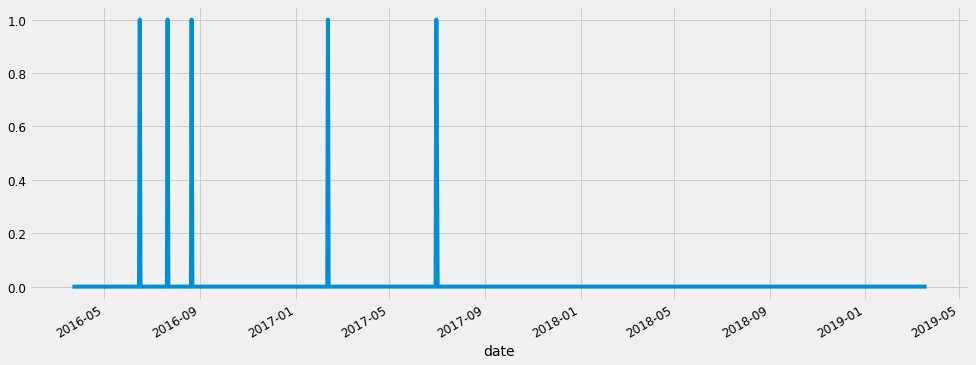

In [318]:
y.plot(figsize=(15, 6))
plt.show()

In [319]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [320]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0005      0.298      0.002      0.999      -0.583       0.584
ma.L1         -1.0000      8.868     -0.113      0.910     -18.381      16.381
ar.S.L12      -0.5000      0.005   -101.362      0.000      -0.510      -0.490
sigma2         0.0070      0.062      0.113      0.910      -0.115       0.129


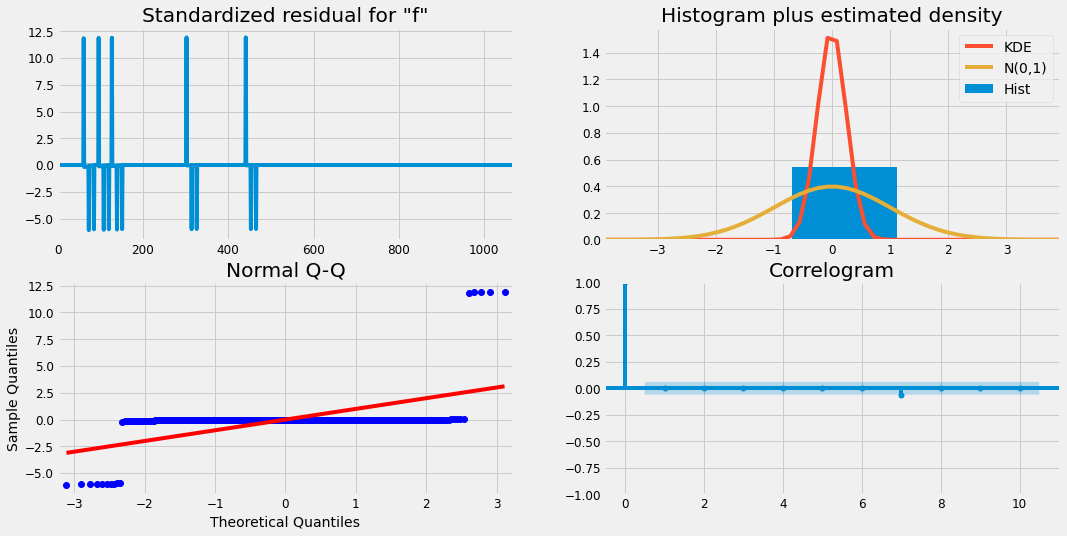

In [321]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

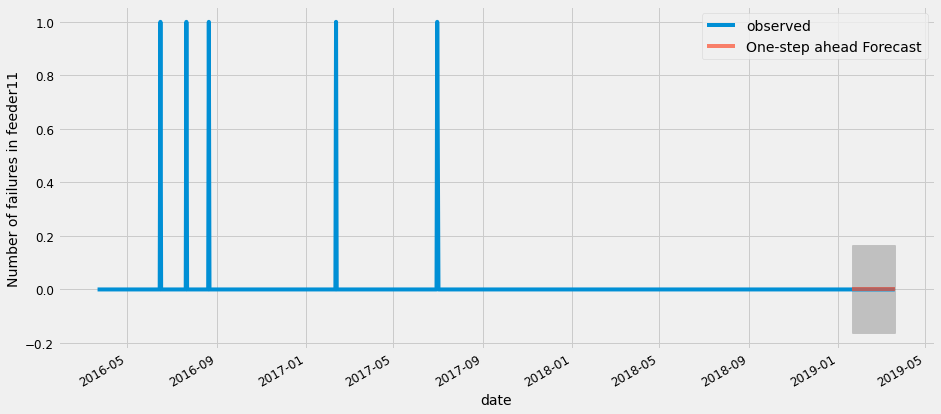

In [322]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder11')
plt.legend()
plt.show()

__MSE__

In [323]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


__RMSE__

In [324]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 0.0


# Feeder12

In [325]:
df12=data[['date','feeder12']]
df12 = df12.sort_values('date')

In [326]:
df12 = df12.groupby('date')['feeder12'].sum().reset_index()

In [327]:
df12 = df12.set_index('date')
df12.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [328]:
y = df12['feeder12']

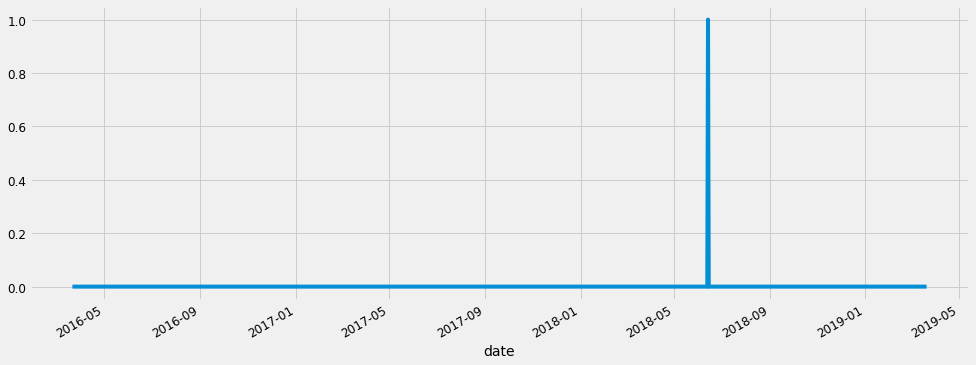

In [329]:
y.plot(figsize=(15, 6))
plt.show()

In [330]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0004      0.804      0.001      1.000      -1.576       1.577
ma.L1         -1.0000      1.020     -0.981      0.327      -2.999       0.999
ar.S.L12      -0.5000      0.002   -234.553      0.000      -0.504      -0.496
sigma2         0.0014      0.001      0.979      0.328      -0.001       0.004


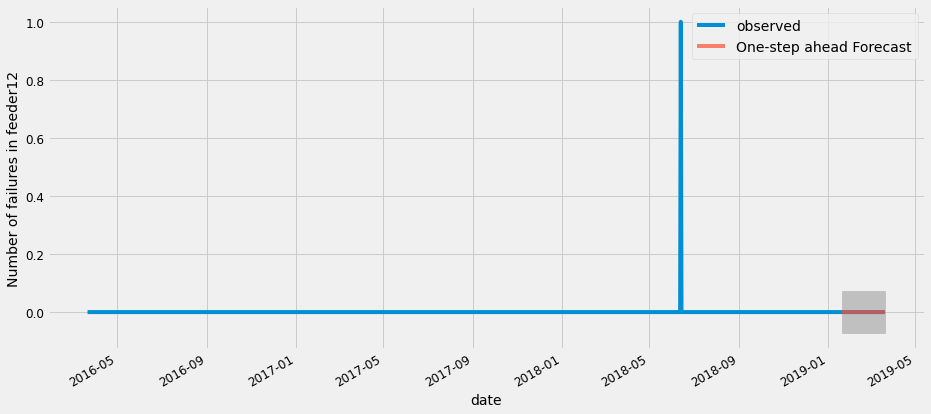

In [333]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20 09:53:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Number of failures in feeder12')
plt.legend()
plt.show()

__MSE__

In [332]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-12-15 10:46:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


# Feeder13

In [334]:
df13=data[['date','feeder13']]
df13 = df13.sort_values('date')

In [335]:
df13 = df13.groupby('date')['feeder13'].sum().reset_index()

In [336]:
df13 = df13.set_index('date')
df13.index

DatetimeIndex(['2016-03-20 22:33:00', '2016-03-21 19:22:00',
               '2016-03-22 19:21:00', '2016-03-23 18:25:00',
               '2016-03-24 18:20:00', '2016-03-25 18:14:00',
               '2016-03-26 16:46:00', '2016-03-27 13:44:00',
               '2016-03-28 10:14:00', '2016-03-29 06:31:00',
               ...
               '2019-03-11 22:16:00', '2019-03-12 18:43:00',
               '2019-03-13 18:29:00', '2019-03-14 17:36:00',
               '2019-03-15 16:35:00', '2019-03-16 12:18:00',
               '2019-03-17 11:53:00', '2019-03-18 11:37:00',
               '2019-03-19 11:03:00', '2019-03-20 10:41:00'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [337]:
y = df13['feeder13']

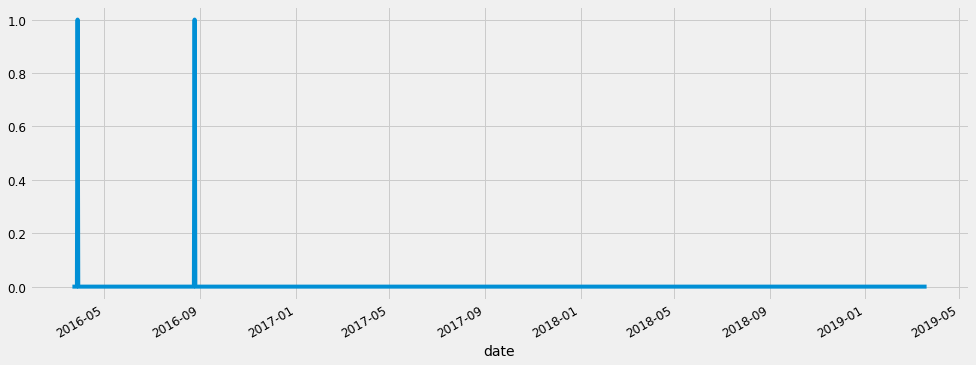

In [338]:
y.plot(figsize=(15, 6))
plt.show()